# Company X

I have been working from the perspective of a data analyst for a company, Company X, which has sales agents (represented by the Agents table), customers (represented by the Customers table), and orders (represented by the Orders table).

Other tables were included with the sample data, but they had very few rows and didn't link with the rest of the data, so I chose to omit them from my analysis.

Over the course of this analysis, I came to some conclusions:
<ul>
    <li>Total sales by each agent in the 2008 period recorded are not indicative of the commission rate received by each agent.  The best performing agents are sometimes receiving the lowest commission, and the lowest performing agents are sometimes receiving the highest commission.  An adjustment in commission rate policy may have potential to increase the overall sales for Company X.</li>
    <li>Strongest sales took place in the months of July, August, and September. No sales above 7000 took place in any other month, and no sales are listed in November and December, 2008.</li>
    <li>The geographic distribution of sales agents has disparities when compared with the geographic distribution of total sales.  The two highest sales regions, Chennai and Mumbai, each only have one sales agent, while Bangalore, which is in the middle of the pack in terms of total sales, has three agents.</li>
</ul>

Please find below the SQL queries and Python code used to come to these conclusions, as well as accompanying visualizations.

## Environment Setup

In [1]:
# Set up connection between MySQL and Python
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="",
  database='sample'
)

# Set up cursor object
cur = mydb.cursor()

# Test the connection
cur.execute("SHOW DATABASES")
for x in cur:
    print(x)

('KOHO',)
('information_schema',)
('koho',)
('mysql',)
('performance_schema',)
('sample',)
('test',)


In [2]:
# Get an overview of agents table
cur.execute("SELECT * FROM agents;")
result = cur.fetchall()
for x in result:
    print(x)

('A007', 'Ramasundar', 'Bangalore', Decimal('0.15'), '077-25814763', '\r')
('A003', 'Alex', 'London', Decimal('0.13'), '075-12458969', '\r')
('A008', 'Alford', 'New York', Decimal('0.12'), '044-25874365', '\r')
('A011', 'Ravi Kumar', 'Bangalore', Decimal('0.15'), '077-45625874', '\r')
('A010', 'Santakumar', 'Chennai', Decimal('0.14'), '007-22388644', '\r')
('A012', 'Lucida', 'San Jose', Decimal('0.12'), '044-52981425', '\r')
('A005', 'Anderson', 'Brisban', Decimal('0.13'), '045-21447739', '\r')
('A001', 'Subbarao', 'Bangalore', Decimal('0.14'), '077-12346674', '\r')
('A002', 'Mukesh', 'Mumbai', Decimal('0.11'), '029-12358964', '\r')
('A006', 'McDen', 'London', Decimal('0.15'), '078-22255588', '\r')
('A004', 'Ivan', 'Torento', Decimal('0.15'), '008-22544166', '\r')
('A009', 'Benjamin', 'Hampshair', Decimal('0.11'), '008-22536178', '\r')


## Sales and Commission by Agent

In [3]:
# Get set up to use python libraries for visualization and data manipulation
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')
from pylab import *
%matplotlib inline

# Explore the commission rates of all sales agents
cur.execute("SELECT AGENT_NAME, COMMISSION FROM agents;")
result = cur.fetchall()
for x in result:
    print(x)

('Ramasundar', Decimal('0.15'))
('Alex', Decimal('0.13'))
('Alford', Decimal('0.12'))
('Ravi Kumar', Decimal('0.15'))
('Santakumar', Decimal('0.14'))
('Lucida', Decimal('0.12'))
('Anderson', Decimal('0.13'))
('Subbarao', Decimal('0.14'))
('Mukesh', Decimal('0.11'))
('McDen', Decimal('0.15'))
('Ivan', Decimal('0.15'))
('Benjamin', Decimal('0.11'))


In [4]:
# Convert the results of the SQL query into a pandas dataframe
commission = pd.DataFrame( [[ij for ij in i] for i in result] )

# Convert the decimal datatype into float
commission[1] = commission[1].astype('float')

# Reorder the dataframe by commission rate, from highest to lowest
commission = commission.sort_values(by=[1], ascending=False)

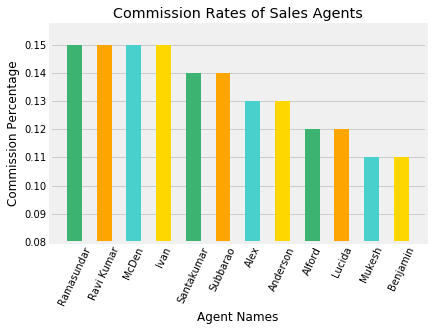

In [5]:
from numpy import arange

# Create a bar graph of the agents' commision rates
bar_heights = commission[1].values
bar_positions = arange(12) + 0.75
fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, 0.5, tick_label=commission[0], color=['mediumseagreen','orange','mediumturquoise', 'gold'])
ax.set_xticklabels(labels=commission[0], rotation=65)
ax.set_ylim(bottom=0.08)
ax.grid(axis='x')
plt.title('Commission Rates of Sales Agents')
plt.xlabel('Agent Names')
plt.ylabel('Commission Percentage')
plt.show()

In [6]:
# Find the mean commission rate
cur.execute("SELECT AVG(COMMISSION) FROM agents;")
result = cur.fetchall()
for x in result:
    print(x)

(Decimal('0.133333'),)


The sales agents with the highest commission rate (15% - Ramasundar, Ravi Kumar, McDen, and Ivan) make an additional 35% on each sale compared to the commissions of the agents with the lowest rate (11% - Mukesh, Benjamin).  The mean commission earned is approximately 13.3%.

In [7]:
# Join the orders table to the agents table on agent code, and view total sales amounts by agent
sales_query = '''
SELECT 
    o.AGENT_CODE, 
    a.AGENT_NAME, 
    SUM(o.ORD_AMOUNT) 
FROM orders o 
INNER JOIN agents a 
    ON o.AGENT_CODE = a.AGENT_CODE 
GROUP BY 1;
'''
cur.execute(sales_query)
result = cur.fetchall()
for x in result:
    print(x)

('A001', 'Subbarao', Decimal('800.00'))
('A002', 'Mukesh', Decimal('12700.00'))
('A003', 'Alex', Decimal('3500.00'))
('A004', 'Ivan', Decimal('9500.00'))
('A005', 'Anderson', Decimal('7700.00'))
('A006', 'McDen', Decimal('3000.00'))
('A007', 'Ramasundar', Decimal('2500.00'))
('A008', 'Alford', Decimal('7500.00'))
('A009', 'Benjamin', Decimal('500.00'))
('A010', 'Santakumar', Decimal('17000.00'))
('A011', 'Ravi Kumar', Decimal('5000.00'))
('A012', 'Lucida', Decimal('2900.00'))


In [8]:
# Convert the results of the SQL query into a pandas dataframe
total_sales = pd.DataFrame( [[ij for ij in i] for i in result] )

# Convert the decimal datatype into float
total_sales[2] = total_sales[2].astype('float')

# Reorder the dataframe by sales, from highest to lowest
total_sales = total_sales.sort_values(by=[2], ascending=False)

total_sales

,0,1,2
9,A010,Santakumar,17000.0
1,A002,Mukesh,12700.0
3,A004,Ivan,9500.0
4,A005,Anderson,7700.0
7,A008,Alford,7500.0
10,A011,Ravi Kumar,5000.0
2,A003,Alex,3500.0
5,A006,McDen,3000.0
11,A012,Lucida,2900.0
6,A007,Ramasundar,2500.0


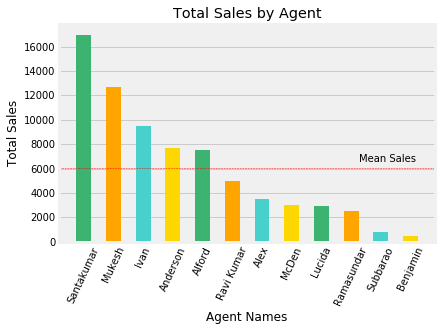

In [9]:
# Create a bar graph of the agents' sales
bar_heights = total_sales[2].values
bar_positions = arange(12) + 0.75
fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, 0.5, tick_label=total_sales[1], color=['mediumseagreen','orange','mediumturquoise', 'gold'])
ax.set_xticklabels(labels=total_sales[1], rotation=65)
ax.axhline(y=(mean(total_sales[2])), color='red', linewidth=0.5, linestyle='dashed')
ax.text(10, 6500, 'Mean Sales')
ax.grid(axis='x')
plt.title('Total Sales by Agent')
plt.xlabel('Agent Names')
plt.ylabel('Total Sales')
plt.show()

As measured on pure sales, Santakumar was the clear winner.  They achieved 33% more sales than their next competitor, Mukesh.  When taking into account the differing commission rates, however, it is possible that the hierarchy of agents will look different.

In [10]:
# View the total commissions earned by agent
sales_query = '''
SELECT 
    o.AGENT_CODE, 
    a.AGENT_NAME, 
    (a.COMMISSION * SUM(o.ORD_AMOUNT)) commission_earned
FROM orders o 
INNER JOIN agents a 
    ON o.AGENT_CODE = a.AGENT_CODE 
GROUP BY 1;
'''
cur.execute(sales_query)
result = cur.fetchall()
for x in result:
    print(x)

('A001', 'Subbarao', Decimal('112.0000'))
('A002', 'Mukesh', Decimal('1397.0000'))
('A003', 'Alex', Decimal('455.0000'))
('A004', 'Ivan', Decimal('1425.0000'))
('A005', 'Anderson', Decimal('1001.0000'))
('A006', 'McDen', Decimal('450.0000'))
('A007', 'Ramasundar', Decimal('375.0000'))
('A008', 'Alford', Decimal('900.0000'))
('A009', 'Benjamin', Decimal('55.0000'))
('A010', 'Santakumar', Decimal('2380.0000'))
('A011', 'Ravi Kumar', Decimal('750.0000'))
('A012', 'Lucida', Decimal('348.0000'))


In [11]:
# Convert the results of the SQL query into a pandas dataframe
total_earnings = pd.DataFrame( [[ij for ij in i] for i in result] )

# Convert the decimal datatype into float
total_earnings[2] = total_earnings[2].astype('float')

# Reorder the dataframe by sales, from highest to lowest
total_earnings = total_earnings.sort_values(by=[2], ascending=False)

total_earnings

,0,1,2
9,A010,Santakumar,2380.0
3,A004,Ivan,1425.0
1,A002,Mukesh,1397.0
4,A005,Anderson,1001.0
7,A008,Alford,900.0
10,A011,Ravi Kumar,750.0
2,A003,Alex,455.0
5,A006,McDen,450.0
6,A007,Ramasundar,375.0
11,A012,Lucida,348.0


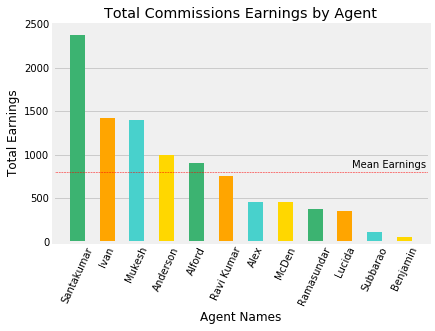

In [12]:
# Create a bar graph of the agents' earnings from commissions
bar_heights = total_earnings[2].values
bar_positions = arange(12) + 0.75
fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, 0.5, tick_label=total_sales[1], color=['mediumseagreen','orange','mediumturquoise', 'gold'])
ax.set_xticklabels(labels=total_earnings[1], rotation=65)
ax.axhline(y=(mean(total_earnings[2])), color='red', linewidth=0.5, linestyle='dashed')
ax.text(10, 850, 'Mean Earnings')
ax.grid(axis='x')
plt.title('Total Commissions Earnings by Agent')
plt.xlabel('Agent Names')
plt.ylabel('Total Earnings')
plt.show()

The top 5 agents as measured by commissions earned are the same as the top 5 when measured by total sales.  The biggest difference between the two metrics is that Ivan's total sales were lower than Mukesh's by 3200, but he made about 30 more in commissions than Mukhesh because his commission rate (15%) is higher than Mukesh's commission rate (11%).

In [13]:
# View the total sales by agent compared to the agent's commission rate, ordered by sales from highest to lowest
sales_commission_query = '''
SELECT 
    o.AGENT_CODE, 
    a.AGENT_NAME,  
    SUM(o.ORD_AMOUNT),
    a.COMMISSION
FROM orders o 
INNER JOIN agents a 
    ON o.AGENT_CODE = a.AGENT_CODE 
GROUP BY 1
ORDER BY 3 DESC;
'''
cur.execute(sales_commission_query)
result = cur.fetchall()
for x in result:
    print(x)

('A010', 'Santakumar', Decimal('17000.00'), Decimal('0.14'))
('A002', 'Mukesh', Decimal('12700.00'), Decimal('0.11'))
('A004', 'Ivan', Decimal('9500.00'), Decimal('0.15'))
('A005', 'Anderson', Decimal('7700.00'), Decimal('0.13'))
('A008', 'Alford', Decimal('7500.00'), Decimal('0.12'))
('A011', 'Ravi Kumar', Decimal('5000.00'), Decimal('0.15'))
('A003', 'Alex', Decimal('3500.00'), Decimal('0.13'))
('A006', 'McDen', Decimal('3000.00'), Decimal('0.15'))
('A012', 'Lucida', Decimal('2900.00'), Decimal('0.12'))
('A007', 'Ramasundar', Decimal('2500.00'), Decimal('0.15'))
('A001', 'Subbarao', Decimal('800.00'), Decimal('0.14'))
('A009', 'Benjamin', Decimal('500.00'), Decimal('0.11'))


A direct comparison of the total sales of each agent versus their commissions rate shows that there is no real relationship between the commission rate and the volume of sales for each agent.  The second highest performer is set at the lowest commission percentage, while two of the bottom three performers in terms of sales are receiving top commission rates.  It is unclear how the commission rates are being set.  It is possible that agents are being rewarded for seniority and company loyalty with increased commission rates.

If the company wants to create additional sales incentive, they could move to a system where higher performance was rewarded with higher commission rates.  An example of this would be a graduated commission system, where total sales above certain thresholds in a certain timeframe would result in higher commission rates.

## 2008 Sales by Month

In [14]:
# Display the total sales for Company X by month
order_date_query = '''
SELECT 
    SUM(ORD_AMOUNT),
    EXTRACT(MONTH FROM ORD_DATE)
FROM orders
GROUP BY 2; 
'''
cur.execute(order_date_query)
result = cur.fetchall()
for x in result:
    print(x)

(Decimal('1000.00'), 1)
(Decimal('6000.00'), 2)
(Decimal('1500.00'), 3)
(Decimal('5500.00'), 4)
(Decimal('5500.00'), 5)
(Decimal('6200.00'), 6)
(Decimal('22500.00'), 7)
(Decimal('12900.00'), 8)
(Decimal('14700.00'), 9)
(Decimal('2800.00'), 10)


In [15]:
# Convert the results of the SQL query into a pandas dataframe
orders_by_month = pd.DataFrame( [[ij for ij in i] for i in result] )

# Convert the datatype into float
orders_by_month[0] = orders_by_month[0].astype('float')

# Sort the orders by date
orders_by_month = orders_by_month.sort_values(by=[1])

# Display a sample of the dataframe
orders_by_month

,0,1
0,1000.0,1
1,6000.0,2
2,1500.0,3
3,5500.0,4
4,5500.0,5
5,6200.0,6
6,22500.0,7
7,12900.0,8
8,14700.0,9
9,2800.0,10


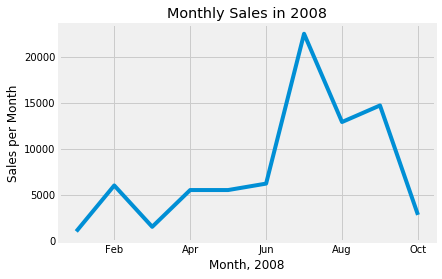

In [16]:
# Create a scatterplot of sales over time
months = ['Feb', 'Apr', 'Jun', 'Aug', 'Oct']
ticks = np.arange(2,12,2)

fig, ax = plt.subplots()
plt.plot(orders_by_month[1], orders_by_month[0])
plt.title('Monthly Sales in 2008')
plt.xlabel('Month, 2008')
plt.ylabel('Sales per Month')
plt.xticks(ticks, months)
plt.show()

For this business, the strongest sales months seem to be in the months of July, August, and September.  No sales data exists for November or December of 2008 in this dataset.  It's possible that this data was extracted before the end of Q4 of 2008, or that no sales took place during these months.

## Sales Agents and Sales by Geographic Area

In [17]:
# Display the number of sales agents per working_area
agent_area_query = '''
SELECT 
    WORKING_AREA,
    COUNT(WORKING_AREA)
FROM agents
GROUP BY 1
ORDER BY 2 DESC;
'''
cur.execute(agent_area_query)
result = cur.fetchall()
for x in result:
    print(x)

('Bangalore', 3)
('London', 2)
('Mumbai', 1)
('Torento', 1)
('New York', 1)
('Hampshair', 1)
('Chennai', 1)
('San Jose', 1)
('Brisban', 1)


In [18]:
# Convert the results of the SQL query into a pandas dataframe
agents_by_area = pd.DataFrame( [[ij for ij in i] for i in result] )

# Display dataframe
agents_by_area

,0,1
0,Bangalore,3
1,London,2
2,Mumbai,1
3,Torento,1
4,New York,1
5,Hampshair,1
6,Chennai,1
7,San Jose,1
8,Brisban,1


In [19]:
# Display total sales per working_area
cust_area_query = '''
SELECT 
    c.WORKING_AREA,
    SUM(o.ORD_AMOUNT)
FROM customer c
INNER JOIN orders o
    ON c.CUST_CODE = o.CUST_CODE
GROUP BY 1
ORDER BY 2 DESC;
'''
cur.execute(cust_area_query)
result = cur.fetchall()
for x in result:
    print(x)

('Chennai', Decimal('17000.00'))
('Mumbai', Decimal('12700.00'))
('London', Decimal('12500.00'))
('Torento', Decimal('9500.00'))
('Bangalore', Decimal('8300.00'))
('Brisban', Decimal('7700.00'))
('New York', Decimal('7500.00'))
('San Jose', Decimal('2900.00'))
('Hampshair', Decimal('500.00'))


In [20]:
# Convert the results of the SQL query into a pandas dataframe
cust_by_area = pd.DataFrame( [[ij for ij in i] for i in result] )

# Display dataframe
cust_by_area

,0,1
0,Chennai,17000.00
1,Mumbai,12700.00
2,London,12500.00
3,Torento,9500.00
4,Bangalore,8300.00
5,Brisban,7700.00
6,New York,7500.00
7,San Jose,2900.00
8,Hampshair,500.00


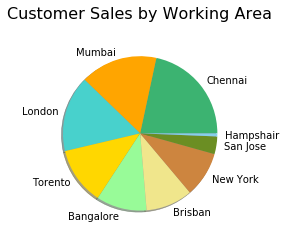

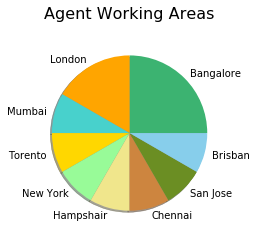

In [21]:
# Create a pie chart of agent working locations
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.pie(cust_by_area[1], labels=cust_by_area[0], shadow=True, colors=['mediumseagreen','orange','mediumturquoise', 'gold', 'palegreen', 'khaki', 'peru', 'olivedrab', 'skyblue'])
plt.title('Customer Sales by Working Area', fontsize=16)
plt.axis('equal')
plt.show()

# Create a pie chart of agent working locations
plt.subplot(1,2,2)
plt.pie(agents_by_area[1], labels=agents_by_area[0], shadow=True, colors=['mediumseagreen','orange','mediumturquoise', 'gold', 'palegreen', 'khaki', 'peru', 'olivedrab', 'skyblue'])
plt.title('Agent Working Areas', fontsize=16)
plt.axis('equal')
plt.show()

The distribution of sales agents and of actual sales seems to have geographic disparities, when visualized with pie charts.  Chennai's customers contribute to the most sales, but only one staff member represents the region.  Mumbai's customers have the second highest sales volumes, but also have only one sales agent.

Conversely, Bangalore area has three sales agents, but less than half the sales volume of Chennai, which only has one agent.

If the company wants to improve sales, it could consider restructuring its sales agents geographic responsibilities to better reflect the realities of business volume.

## Conclusion

Here are possible courses of action for Company X to consider as a result of this analysis:

<ol>
    <li><b>Commission - </b>Consider adjustments to commission rates for sales agents, in order to incentivize higher employee performance and reward current high performers.</li>
    <li><b>Monthly Sales - </b>Consider diversifying product offerings to increase revenue outside of the July-September busy period.</li>
    <li><b>Working Areas - </b>Consider redistributing total sales staff to better reflect increased business opportunities in current high-performing areas of Chennai and Mumbai.</li>
</ol>


